
## Ex1: Participant Exercise
Download the daily stock price of four or five randomly selected stocks from very different sectors or industries for the last 6 months. (Each of these stocks should have been taken from different industry sectors.)

- Find out the outlier events (date and the gain or loss) for each of these stocks based on box plot analysis.
- Find out the correlation of daily gains of each of these stocks.
- Draw the scatter plots and the heatmap.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

#### Daily Data Of Sensex
- For the period of **23 September 2022 to 23 March 2023**

In [2]:
sensex = pd.read_csv("E:\ML_course\practice\S2_Statastical_Interferance_(part 2)\sensex.csv", parse_dates=['Date'])
sensex = sensex.set_index(['Date'], drop=True)
sensex.sort_index(ascending = True, inplace=True)
sensex['gain'] = ((sensex['Close'] - sensex['Open']) * 100 /sensex['Open'])
sensex[['Close','Open','gain']]

C:\Users\ATHARVA\AppData\Local\Temp\ipykernel_4656\1660109477.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sensex = pd.read_csv("E:\ML_course\practice\S2_Statastical_Interferance_(part 2)\sensex.csv", parse_dates=['Date'])


,Close,Open,gain
Date,,,
2022-09-23,58098.92,59005.18,-1.535899
2022-09-26,57145.22,57525.03,-0.660252
2022-09-27,57107.52,57376.52,-0.468833
2022-09-28,56598.28,56710.13,-0.197231
2022-09-29,56409.96,56997.90,-1.031512
...,...,...,...
2023-03-17,57989.90,58038.17,-0.083169
2023-03-20,57628.95,57773.55,-0.250288
2023-03-21,58074.68,57963.27,0.192208


### Datasets 

We will use the following real world data for this notebook.

- Daily movement of sectoral indices.
    - Banks - HDFC bank
    - Metal - JSW steel
    - Healthcare - MAX HealthCare
    - Tech - Persistant
    - Car - TATA Motors
- For the period of **23 September 2022 to 23 March 2023**
- The dails stock price data can be downloaded from **BSE India Site**

https://www.bseindia.com/indices/IndexArchiveData.html

In [3]:
path = 'E:\ML_course\practice\S2_Statastical_Interferance_(part 2)/'

In [4]:
def Gain( filename ):
    df = pd.read_csv(filename, index_col = False, parse_dates=['Date'])
    df = df.set_index(['Date'], drop=True)
    df.sort_index(ascending = True, inplace=True)
    df['gain'] = ((df['Close Price'] - df['Open Price']) * 100 /df['Open Price'])

    return df[['Close Price', 'Open Price', 'gain']]

In [5]:
max = Gain(path+"max_healthcare.csv")
hdfc = Gain(path+"hdfc_bank.csv")
persis = Gain(path+"persistant.csv")
tata = Gain(path+"tata_motors.csv")
steel = Gain(path+"jsw_steel.csv")

In [6]:
sensex['max_gain'] = max['gain']
sensex['hdfc_gain'] = hdfc['gain']
sensex['persis_gain'] = persis['gain']
sensex['tata_gain'] = tata['gain']
sensex['steel_gain'] = steel['gain']

In [7]:
sensex.head(5)

,Open,High,Low,Close,gain,max_gain,hdfc_gain,persis_gain,tata_gain,steel_gain
Date,,,,,,,,,,
2022-09-23,59005.18,59143.32,57981.95,58098.92,-1.535899,-0.419972,-0.498063,-2.603715,-1.958285,-1.524413
2022-09-26,57525.03,57708.38,57038.24,57145.22,-0.660252,-1.811765,-1.859155,1.253185,-4.411058,-1.404580
2022-09-27,57376.52,57704.57,56950.52,57107.52,-0.468833,-0.672269,-0.733333,-0.878125,-1.042184,-1.040777
2022-09-28,56710.13,57213.33,56485.67,56598.28,-0.197231,-1.402439,-1.028945,0.713848,1.025316,-2.606841
2022-09-29,56997.90,57166.14,56314.05,56409.96,-1.031512,-1.302051,1.666667,-0.085113,-1.734245,-0.024252


### Finding outliers using box plot
- A boxplot displays the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
##### Finding median, IQR, min and max values
**IQR = Q3 – Q1**

**Q1 is 25%**

**Q3 is 75%**
- Min = Q1 - 1.5*IQR
- Max = Q3 + 1.5*IQR

In [8]:
# MAX Healthcare
max.gain.median()
max_gain_stats = max.gain.describe()
max_gain_stats
iqr_max = stats.iqr(max.gain)
min_maxgain = max_gain_stats['25%'] - 1.5 * iqr_max
max_maxgain = max_gain_stats['75%'] + 1.5 * iqr_max
min_maxgain,max.gain.median(),max_maxgain

(-5.291668544970364, -0.011367511651702028, 5.198454794491991)

In [9]:
# HDFC Bank 
hdfc.gain.median()
hdfc_gain_stats = hdfc.gain.describe()
hdfc_gain_stats
iqr_hdfc = stats.iqr(hdfc.gain)
min_hdfcgain = hdfc_gain_stats['25%'] - 1.5 * iqr_hdfc
max_hdfcgain =hdfc_gain_stats['75%'] + 1.5 * iqr_hdfc
min_hdfcgain,hdfc.gain.median(),max_hdfcgain

(-3.5613569974941894, -0.17302798982188758, 3.336155219913306)

In [10]:
# Persistant
persis.gain.median()
persis_gain_stats = persis.gain.describe()
persis_gain_stats
iqr_persis = stats.iqr(persis.gain)
min_persisgain = persis_gain_stats['25%'] - 1.5 * iqr_persis
max_persisgain = persis_gain_stats['75%'] + 1.5 * iqr_persis
min_persisgain,persis.gain.median(),max_persisgain

(-5.360013007060129, -0.2261794050448215, 5.401946943795377)

In [11]:
# TATA Motors
tata.gain.median()
tata_gain_stats = tata.gain.describe()
tata_gain_stats
iqr_tata = stats.iqr(tata.gain)
min_tatagain = tata_gain_stats['25%'] - 1.5 * iqr_tata
max_tatagain = tata_gain_stats['75%'] + 1.5 * iqr_tata
min_tatagain,tata.gain.median(),max_tatagain

(-3.607982532818598, -0.2176541717049522, 3.127369233323694)

In [12]:
# JSW Steel
steel.gain.median()
steel_gain_stats = steel.gain.describe()
steel_gain_stats
iqr_steel = stats.iqr(steel.gain)
min_steelgain = steel_gain_stats['25%'] - 1.5 * iqr_steel
max_steelgain = steel_gain_stats['75%'] + 1.5 * iqr_steel
min_steelgain,steel.gain.median(),max_steelgain

(-3.8014662148124314, 0.3391942406202472, 4.299107175724062)

### OUTLIERS

In [13]:
# MAX Healthcare
max[max.gain > max_maxgain]


,Close Price,Open Price,gain
Date,,,
2022-10-31,455.9,432.0,5.532407


In [14]:
# HDFC Bank
hdfc[hdfc.gain > max_hdfcgain]

,Close Price,Open Price,gain
Date,,,
2022-11-24,572.45,550.0,4.081818
2023-01-03,595.50,568.0,4.841549
2023-02-08,508.40,483.3,5.193462
2023-03-21,482.70,467.0,3.361884


In [15]:
# Persistant
persis[persis.gain > max_persisgain]

,Close Price,Open Price,gain
Date,,,
2022-10-06,3558.85,3350.05,6.232743
2023-01-19,4257.55,3959.55,7.526108
2023-01-23,4586.05,4315.20,6.276650


In [16]:
#TATA Motors
tata[tata.gain > max_tatagain]

,Close Price,Open Price,gain
Date,,,
2023-01-10,413.05,399.3,3.443526
2023-01-24,422.10,409.1,3.177707


In [17]:
#JSW Steel
steel[steel.gain > max_steelgain]

,Close Price,Open Price,gain
Date,,,
2022-10-06,674.90,645.05,4.627548
2022-10-27,679.45,646.30,5.129197


#### Scatter Plot between Sensex and Secotral Indexes

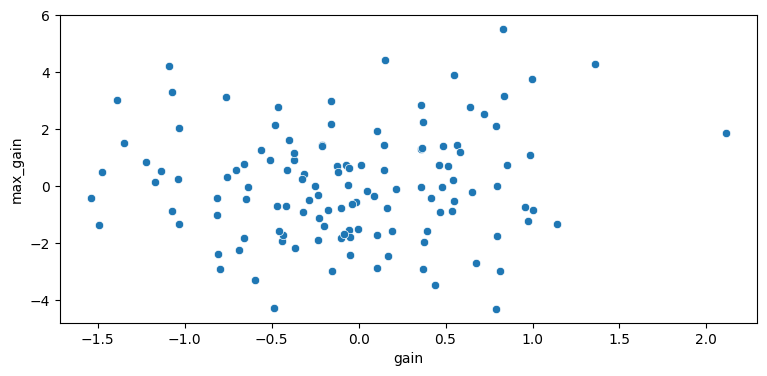

In [18]:
# MAX Healthcare
plt.figure(figsize=(9, 4))
sn.scatterplot(data = sensex, x = 'gain', y = 'max_gain');

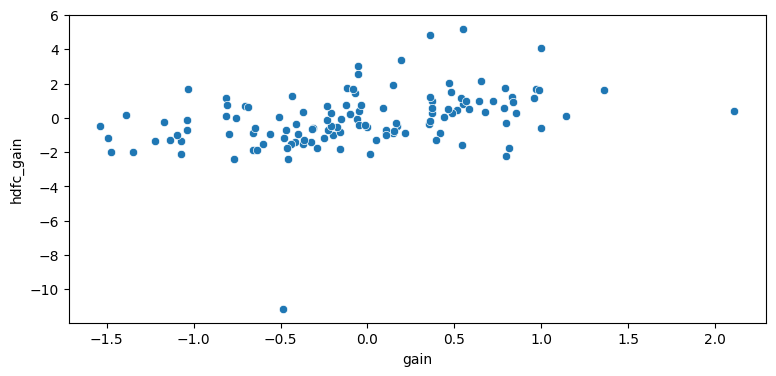

In [19]:
# HDFC Bank
plt.figure(figsize=(9, 4))
sn.scatterplot(data = sensex, x = 'gain', y = 'hdfc_gain');

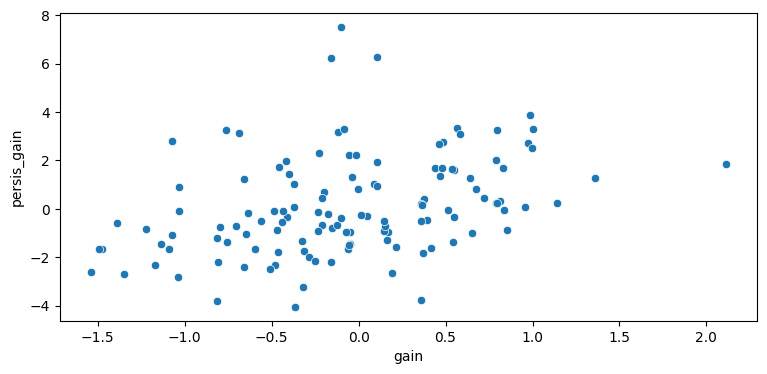

In [20]:
# Persistant
plt.figure(figsize=(9, 4))
sn.scatterplot(data = sensex, x = 'gain', y = 'persis_gain');

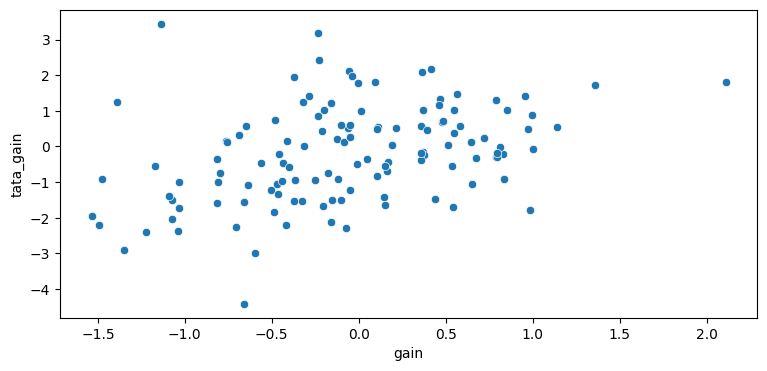

In [21]:
# TATA Motors
plt.figure(figsize=(9, 4))
sn.scatterplot(data = sensex, x = 'gain', y = 'tata_gain');

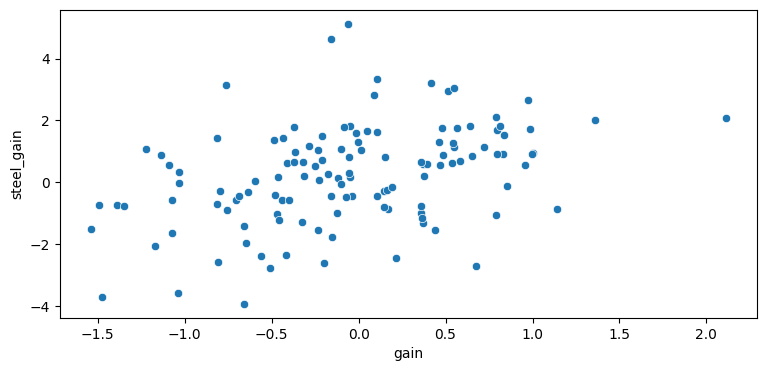

In [22]:
# JSW Steel
plt.figure(figsize=(9, 4))
sn.scatterplot(data = sensex, x = 'gain', y = 'steel_gain');

### Correlation (r)

Correlation measures the extent to which two variables are linearly related (meaning they change together at a constant rate).
- Three Types of correlation
  - The closer the correlation is to zero, the weaker the linear relationship.
  - Positive correlation values indicate a positive correlation, where the values of both variables tend to increase together.
  - Negative correlation values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.

Correlation is given by:

$$\frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sigma_{x}\sigma_{y}}$$

This is also known as **Pearson Correlation**.

- | r | < 0.25 - No relationship
- 0.25 < | r | < 0.5 - Weak relationship
- 0.5 < | r | < 0.75 - Moderate relationship
- | r | > 0.75 - Strong relationship


In [23]:
# MAX Healthcare
sensex[['gain', 'max_gain']].corr()

,gain,max_gain
gain,1.000000,0.069517
max_gain,0.069517,1.000000


In [24]:
# HDFC bank
sensex[['gain', 'hdfc_gain']].corr()

,gain,hdfc_gain
gain,1.000000,0.372009
hdfc_gain,0.372009,1.000000


In [25]:
# Persistant
sensex[['gain', 'persis_gain']].corr()

,gain,persis_gain
gain,1.000000,0.369353
persis_gain,0.369353,1.000000


In [26]:
# TATA Motors
sensex[['gain', 'tata_gain']].corr()

,gain,tata_gain
gain,1.00000,0.38513
tata_gain,0.38513,1.00000


In [27]:
# JSW Steel
sensex[['gain', 'steel_gain']].corr()

,gain,steel_gain
gain,1.000000,0.397804
steel_gain,0.397804,1.000000


### Creating a Heatmap

In [28]:
sector_corr = sensex[['gain', 
                      'max_gain', 
                      'hdfc_gain',
                      'persis_gain',
                      'tata_gain',
                      'steel_gain']].corr()
sector_corr

,gain,max_gain,hdfc_gain,persis_gain,tata_gain,steel_gain
gain,1.000000,0.069517,0.372009,0.369353,0.385130,0.397804
max_gain,0.069517,1.000000,0.089243,0.070784,0.041675,0.090473
hdfc_gain,0.372009,0.089243,1.000000,0.136841,0.241666,0.108868
persis_gain,0.369353,0.070784,0.136841,1.000000,0.213970,0.319442
tata_gain,0.385130,0.041675,0.241666,0.213970,1.000000,0.343757
steel_gain,0.397804,0.090473,0.108868,0.319442,0.343757,1.000000


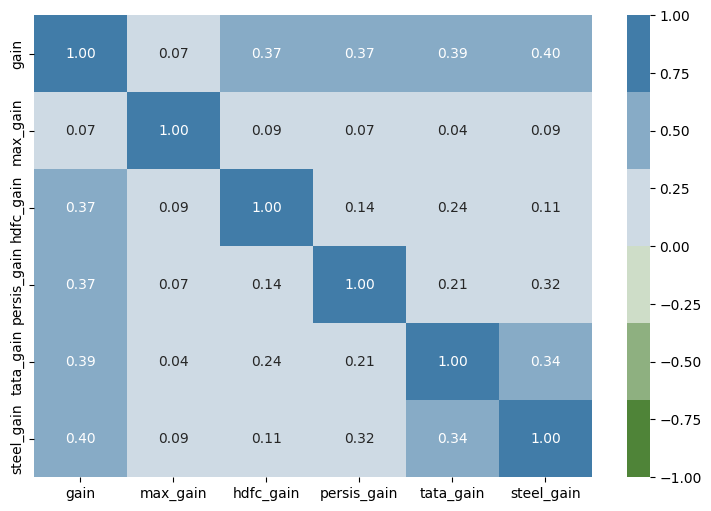

In [29]:
plt.figure(figsize=(9, 6))
sn.heatmap(sector_corr,
           annot = True,
           fmt = "0.2f",
           cmap = sn.diverging_palette(120, 240),
           vmin = -1.0, 
           vmax = 1.0);